# Enter Student Name & ID

In [1]:
student_id = 99101032  #@param {type:"integer"}
student_name = "Mohammad Taher Abadi" #@param {type:"string"}

print("your student id:", student_id)
print("your name:", student_name)

your student id: 99101032
your name: Mohammad Taher Abadi


## Part 1. Implementing Your Own PCA Function.

### 1.1 Complete the function below using only the `numpy` library.

In [2]:
import numpy as np

In [3]:
def myPCA(X, num_components):
    X_centered = X - np.mean(X, axis=0)
    
    covariance_matrix = np.cov(X_centered, rowvar=False)
    
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    
    selected_eigenvectors = sorted_eigenvectors[:, :num_components]
    
    X_reduced = np.dot(X_centered, selected_eigenvectors)
    
    return X_reduced


### 1.2 Perform your PCA function on the IRIS dataset, reduce it to 2D, and plot the results.

In [8]:
import matplotlib as plt
from sklearn.datasets import load_iris

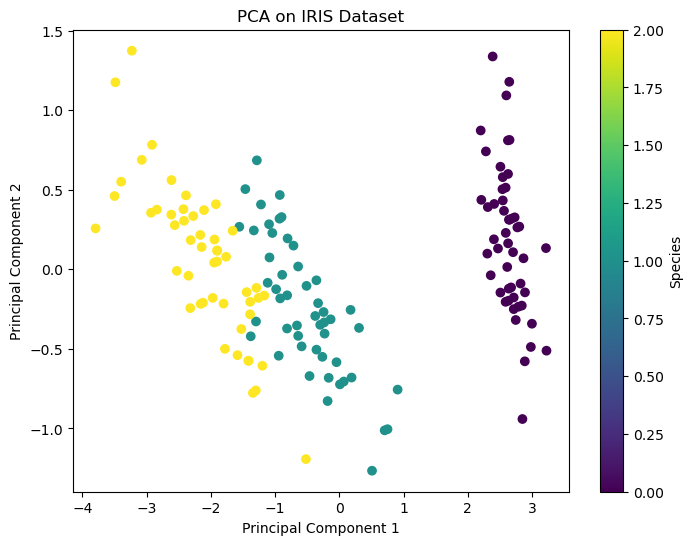

In [4]:
import numpy as np
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

def myPCA(X, num_components):
    X_centered = X - np.mean(X, axis=0)
    
    covariance_matrix = np.cov(X_centered, rowvar=False)
    
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    
    selected_eigenvectors = sorted_eigenvectors[:, :num_components]
    
    X_reduced = np.dot(X_centered, selected_eigenvectors)
    
    return X_reduced

X_reduced = myPCA(X, num_components=2)

plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')
plt.colorbar(label='Species')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on IRIS Dataset')
plt.show()


## Part 2. Faces Dataset

The dataset contains a total of 40 folders, each contains 10 images depicting a specific individual in ten different states.

### 2.1  Describe eigenfaces and how they are related to PCA.

`Answer 2.1: `Eigenfaces refer to the set of eigenvectors used in the computer vision problem of human face recognition. The concept of eigenfaces comes from applying Principal Component Analysis (PCA) to a set of facial images. In PCA, the eigenvectors of the covariance matrix of the set of face images are computed, and these eigenvectors represent the directions in which the data varies the most. When visualized, these eigenvectors look like ghostly faces, hence the term "eigenfaces."

Eigenfaces are related to PCA because they are essentially the principal components of the face image dataset. By projecting the original high-dimensional face images onto a lower-dimensional subspace spanned by these eigenfaces, we can represent the face images more compactly, which is useful for tasks like face recognition, where we want to reduce the dimensionality while preserving as much variance (information) as possible.


### 2.2 Read the given dataset and create train and test matrices. 
For each person, use the first five images for training and the second five images for test (`X_train`, `X_test`). Also, create labels for them (`y_train`, `y_test`).

Note: For reading the images, you can use opencv library. You can install this library using the below command in terminal:

`pip install opencv-python`

In [12]:
import numpy as np
import os
import cv2

def load_orl_faces(data_folder, img_size=(92, 112)):
    X_train, X_test = [], []
    y_train, y_test = [], []
    for i in range(1, 41):  
        folder_path = os.path.join(data_folder, f's{i}')
        if not os.path.exists(folder_path):
            print(f'Folder not found: {folder_path}')
            continue
        
        images = sorted(os.listdir(folder_path))
        for j, img_name in enumerate(images):
            img_path = os.path.join(folder_path, img_name)
            if not os.path.exists(img_path):
                print(f'Image not found: {img_path}')
                continue
            
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  
            if img is None:
                print(f'Failed to load image: {img_path}')
                continue
            
            img = cv2.resize(img, img_size)  
            img_array = img.flatten()  
            if j < 5:
                X_train.append(img_array)
                y_train.append(i)
            else:
                X_test.append(img_array)
                y_test.append(i)
    
    return np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

data_folder = 'F:\Term8\ML\HWs\CHW4\Q1\ORL'  

X_train, X_test, y_train, y_test = load_orl_faces(data_folder)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


Failed to load image: F:\Term8\ML\HWs\CHW4\Q1\ORL\s1\Thumbs.db
Failed to load image: F:\Term8\ML\HWs\CHW4\Q1\ORL\s2\Thumbs.db
Failed to load image: F:\Term8\ML\HWs\CHW4\Q1\ORL\s3\Thumbs.db
Failed to load image: F:\Term8\ML\HWs\CHW4\Q1\ORL\s5\Thumbs.db
Failed to load image: F:\Term8\ML\HWs\CHW4\Q1\ORL\s8\Thumbs.db
Failed to load image: F:\Term8\ML\HWs\CHW4\Q1\ORL\s9\Thumbs.db
Failed to load image: F:\Term8\ML\HWs\CHW4\Q1\ORL\s10\Thumbs.db
Failed to load image: F:\Term8\ML\HWs\CHW4\Q1\ORL\s11\Thumbs.db
Failed to load image: F:\Term8\ML\HWs\CHW4\Q1\ORL\s12\Thumbs.db
Failed to load image: F:\Term8\ML\HWs\CHW4\Q1\ORL\s15\Thumbs.db
Failed to load image: F:\Term8\ML\HWs\CHW4\Q1\ORL\s19\Thumbs.db
Failed to load image: F:\Term8\ML\HWs\CHW4\Q1\ORL\s25\Thumbs.db
Failed to load image: F:\Term8\ML\HWs\CHW4\Q1\ORL\s33\Thumbs.db
Failed to load image: F:\Term8\ML\HWs\CHW4\Q1\ORL\s35\Thumbs.db
Failed to load image: F:\Term8\ML\HWs\CHW4\Q1\ORL\s40\Thumbs.db
X_train shape: (200, 10304)
X_test shape: (200

### 2.3 Performing PCA.

Perform PCA on the data and reduce the dimensionality to a suitable range (e.g., between 40 and 50).

In [13]:
def myPCA(X, num_components):
    X_centered = X - np.mean(X, axis=0)
    
    covariance_matrix = np.cov(X_centered, rowvar=False)

    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    selected_eigenvectors = sorted_eigenvectors[:, :num_components]

    X_reduced = np.dot(X_centered, selected_eigenvectors)
    
    return X_reduced

num_components = 50
X_train_pca = myPCA(X_train, num_components)

X_test_centered = X_test - np.mean(X_train, axis=0)  
X_test_pca = np.dot(X_test_centered, np.linalg.eigh(np.cov(X_train - np.mean(X_train, axis=0), rowvar=False))[1][:, np.argsort(np.linalg.eigh(np.cov(X_train - np.mean(X_train, axis=0), rowvar=False))[0])[::-1]][:, :num_components])

print(f'X_train_pca shape: {X_train_pca.shape}')
print(f'X_test_pca shape: {X_test_pca.shape}')


X_train_pca shape: (200, 50)
X_test_pca shape: (200, 50)


### 2.4 Training a Classifier
Train an LDA classifier on the PCA-transformed data and report the accuracy.

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

lda = LDA()
lda.fit(X_train_pca, y_train)

y_pred = lda.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 92.50%


### 2.5 Varying PCA Dimensions

Repeat the process for different dimensions of PCA (vary from 100 to 40) and discuss the results.

How many features do you think are sufficient?
It's clear in the plot that 90 is the answer.


Number of PCA components: 100, Accuracy: 93.00%
Number of PCA components: 90, Accuracy: 93.50%
Number of PCA components: 80, Accuracy: 92.50%
Number of PCA components: 70, Accuracy: 91.00%
Number of PCA components: 60, Accuracy: 91.50%
Number of PCA components: 50, Accuracy: 92.50%
Number of PCA components: 40, Accuracy: 92.50%


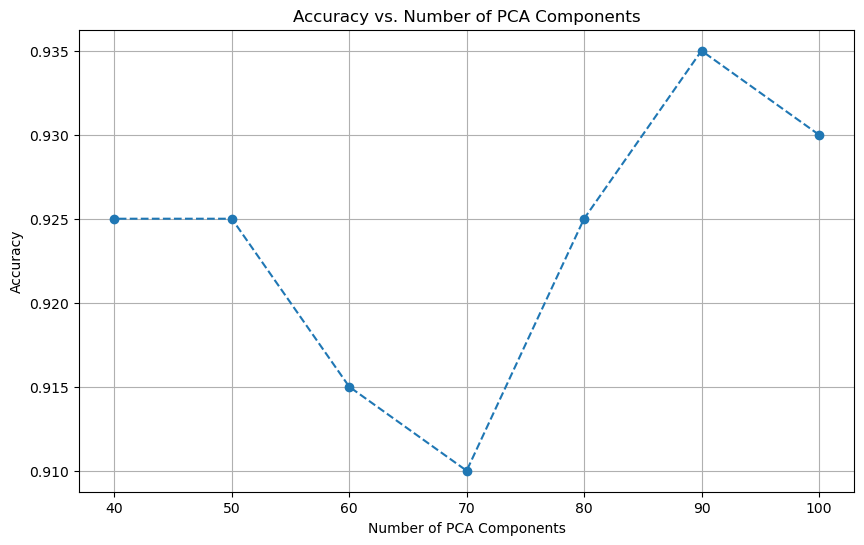

In [18]:
import numpy as np
import os
import cv2
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def load_orl_faces(data_folder, img_size=(92, 112)):
    X_train, X_test = [], []
    y_train, y_test = [], []
    for i in range(1, 41):  
        folder_path = os.path.join(data_folder, f's{i}')
        if not os.path.exists(folder_path):
            print(f'Folder not found: {folder_path}')
            continue
        
        images = sorted(os.listdir(folder_path))
        for j, img_name in enumerate(images):
            img_path = os.path.join(folder_path, img_name)
            if img_name == 'Thumbs.db':
                continue  
            
            if not os.path.exists(img_path):
                print(f'Image not found: {img_path}')
                continue
            
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  
            if img is None:
                print(f'Failed to load image: {img_path}')
                continue
            
            img = cv2.resize(img, img_size)  
            img_array = img.flatten()  
            if j < 5:
                X_train.append(img_array)
                y_train.append(i)
            else:
                X_test.append(img_array)
                y_test.append(i)
    
    return np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

data_folder = 'F:\Term8\ML\HWs\CHW4\Q1\ORL'  

X_train, X_test, y_train, y_test = load_orl_faces(data_folder)

def myPCA(X, num_components):
    
    X_centered = X - np.mean(X, axis=0)

    covariance_matrix = np.cov(X_centered, rowvar=False)

    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    
    selected_eigenvectors = sorted_eigenvectors[:, :num_components]
    
    X_reduced = np.dot(X_centered, selected_eigenvectors)
    
    return X_reduced, selected_eigenvectors

_, precomputed_eigenvectors = myPCA(X_train, num_components=100)

results = []

for num_components in range(100, 39, -10):

    selected_eigenvectors = precomputed_eigenvectors[:, :num_components]
    

    X_train_centered = X_train - np.mean(X_train, axis=0)
    X_train_pca = np.dot(X_train_centered, selected_eigenvectors)
    

    X_test_centered = X_test - np.mean(X_train, axis=0)  
    X_test_pca = np.dot(X_test_centered, selected_eigenvectors)

    lda = LDA()
    lda.fit(X_train_pca, y_train)

    y_pred = lda.predict(X_test_pca)

    accuracy = accuracy_score(y_test, y_pred)

    results.append((num_components, accuracy))

    print(f'Number of PCA components: {num_components}, Accuracy: {accuracy * 100:.2f}%')

results = np.array(results)

plt.figure(figsize=(10, 6))
plt.plot(results[:, 0], results[:, 1], marker='o', linestyle='--')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of PCA Components')
plt.grid(True)
plt.show()
